In [27]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.metrics import accuracy_score as acs, precision_score as prs, f1_score as fs, r2_score as rs 
from sklearn.metrics import confusion_matrix as cnm
from sklearn.metrics import classification_report
import seaborn as sns

In [4]:
df=pd.read_csv('/content/drive/MyDrive/emails.csv')

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
df1=df.dropna(how='all')

In [8]:
print(df.shape)
print(df1.shape)

(5172, 3002)
(5172, 3002)


In [9]:
x=df.drop('Prediction', axis=1)
y=df['Prediction']

In [10]:
x=x.drop('Email No.', axis=1)

In [11]:
print(x.isnull().sum())
print(y.isnull().sum())

the               0
to                0
ect               0
and               0
for               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3000, dtype: int64
0


In [12]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=45)

In [13]:
model=mnb()

In [14]:
model.fit(x_train,y_train)

MultinomialNB()

In [15]:
train_predict=model.predict(x_train)


In [16]:
print(acs(y_train,train_predict))
print(prs(y_train,train_predict))
print(rs(y_train,train_predict))
print(fs(y_train,train_predict))

0.9456127628716461
0.8803353658536586
0.7388127128683756
0.911242603550296


In [17]:
test_predict=model.predict(x_test)

In [18]:
print(acs(y_test,test_predict))
print(prs(y_test,test_predict))
print(rs(y_test,test_predict))
print(fs(y_test,test_predict))

0.9536231884057971
0.8907849829351536
0.7633902631854681
0.9157894736842106


In [21]:
cm=cnm(y_test,test_predict)
cm 

array([[726,  32],
       [ 16, 261]])

In [23]:
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       758
           1       0.89      0.94      0.92       277

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [24]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2914
           1       0.88      0.94      0.91      1223

    accuracy                           0.95      4137
   macro avg       0.93      0.95      0.94      4137
weighted avg       0.95      0.95      0.95      4137



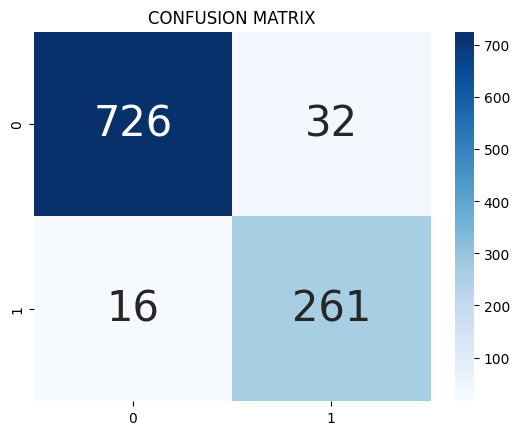

In [26]:
ax=plt.axes()
con_mat=cm
sns.heatmap(con_mat,annot=True, annot_kws={"size":30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('CONFUSION MATRIX')
plt.show()